In [31]:
import pandas as pd
import opendatasets as od
import os 
import csv 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st 

In [32]:
dataset=('https://www.kaggle.com/datasets/satpreetmakhija/netflix-movies-and-tv-shows-2021')

In [33]:
od.download(dataset)

Skipping, found downloaded files in ".\netflix-movies-and-tv-shows-2021" (use force=True to force download)


In [34]:
data_dir=('.\netflix-movies-and-tv-shows-2021')

In [35]:
#load data
netflix_data21 = "netflix-movies-and-tv-shows-2021/netflixData.csv"

In [36]:
current_netflix_data = pd.read_csv(netflix_data21)

5967


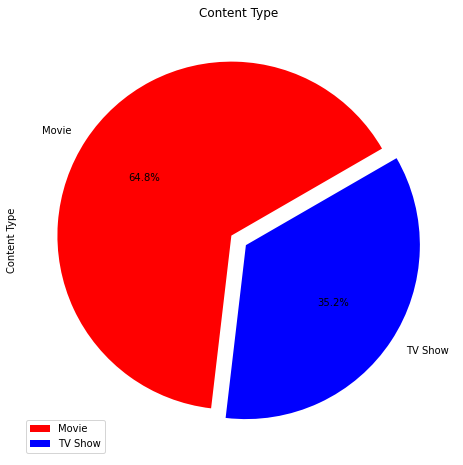

In [37]:
print(len(current_netflix_data))
# comparable with pie chart from cleaned data
# this one will be used to show what we have before data is cleaned
# will show that we are using a sample of the population
content_type = current_netflix_data["Content Type"].value_counts()
content_type
content_type.plot.pie(title= 'Content Type', figsize = (8,8), explode = (0.05, 0.05), autopct='%1.1f%%',colors=['red','blue'], startangle=30 )
plt.savefig("Content Type _Pie uncleaned data.png") 
plt.legend();

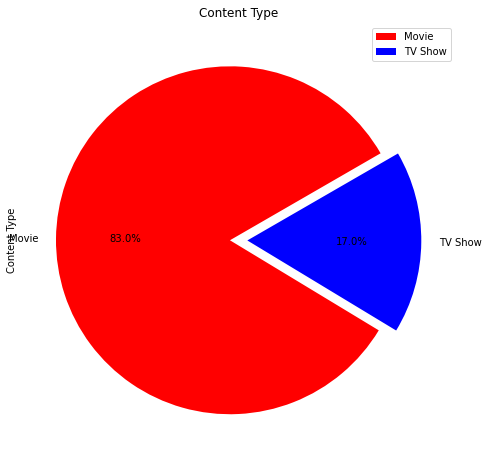

In [38]:
# Cleaning the data
# Remove columns first and then NA rows
reduced_df = current_netflix_data.drop(['Cast', 'Director', 'Description'], axis = 1)
reduced_df
nf_df = reduced_df.dropna(subset=['Date Added', 'Imdb Score', 'Production Country'])

# nf_df.head(100)
# nf_df.isnull().sum()

content_type = nf_df["Content Type"].value_counts()
content_type
content_type.plot.pie(title= 'Content Type', figsize = (8,8), explode = (0.05, 0.05), autopct='%1.1f%%',colors=['red','blue'], startangle=30 )
plt.savefig("new Content Type _Pie cleaned data.png") 
plt.legend();

In [39]:
# # new_nf_df = current_netflix_data.drop(["Director"], axis=1)
# new_nf_df = current_netflix_data.copy()
# # droped na values (rows with null values in these categories)
# nf_df = new_nf_df.dropna(subset=['Director', 'Date Added', 'Cast', 'Imdb Score', 'Production Country'])
# nf_df.head(100)


In [40]:
# nf_df.columns

In [41]:
# print(len(nf_df))

In [60]:
nf_df.isnull().sum()

Show Id               0
Title                 0
Genres                0
Production Country    0
Release Date          0
Rating                0
Duration              0
Imdb Score            0
Content Type          0
Date Added            0
dtype: int64

"""
<br>(1. How current are the release dates of these titles?)
<br>2. Do movies or tv shows have a higher average vote?*
<br>3. How many countries have productions on Netflix?
<br>4. Which countries have the highest rated productions?*
<br>5. What are all the current genres offered?*
<br>6. How many productions in each genre category per country?*
<br>7. How many comedies are TV shows and how many are movies?
<br>8. Which country is releasing the most current comedies?*
<br>9. What are comedies generally rated across these productions?
<br>10.How many comedies have been produced from each country? And are these movies or tv shows? How long (duration) are they?*
"""

In [43]:
# current_netflix_data["Release Date"].unique

In [44]:
# #dropping columns
# new_reduced_df = nf_df.drop(['Cast', 'Director', 'Description'], axis = 1)
# new_reduced = new_reduced_df.reset_index(drop=True)
# new_reduced

In [45]:
# convert all of 'new_reduced' t0 'final_nf_df'
final_nf_df = nf_df.loc[nf_df["Content Type"]!= "TV Show"]
final_nf_df

,Show Id,Title,Genres,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"Horror Movies, International Movies, Thrillers",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Documentaries, International Movies",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,"Documentaries, International Movies",Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"
5,c293788a-41f7-49a3-a7fc-005ea33bce2b,#FriendButMarried,"Dramas, International Movies, Romantic Movies",Indonesia,2018.0,TV-G,102 min,7.0/10,Movie,"May 21, 2020"
6,0555e67e-f624-4a05-93e4-55c117d0056d,#FriendButMarried 2,"Dramas, International Movies, Romantic Movies",Indonesia,2020.0,TV-G,104 min,7.0/10,Movie,"June 28, 2020"
...,...,...,...,...,...,...,...,...,...,...
5957,309b0d7e-357b-45ce-b1cf-617b4c3593d5,Zoot Suit,"Cult Movies, Dramas, Music & Musicals",United States,1981.0,R,103 min,7.0/10,Movie,"April 15, 2021"
5958,a006d6c6-e213-4a8b-9f57-b941e822d0c5,Zozo,"Dramas, International Movies","Sweden, Czech Republic, United Kingdom, Denmar...",2005.0,TV-MA,99 min,6.7/10,Movie,"October 19, 2020"
5961,06aab7f2-9756-4680-98cf-209b7ca86a9b,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,"Documentaries, Music & Musicals","United Kingdom, Canada, United States",2019.0,TV-MA,90 min,7.4/10,Movie,"March 1, 2020"
5962,62b8b682-f191-4c10-aa04-32319329bd8d,الف مبروك,"Comedies, Dramas, International Movies",Egypt,2009.0,TV-14,115 min,7.4/10,Movie,"April 25, 2020"


In [46]:
#totals
#content = new_reduced.groupby(["Content Type"]).count()
content = final_nf_df["Content Type"].value_counts()
content
year = final_nf_df["Release Date"].value_counts()
year
#Find/remove outlier rating (NC-17) 
rating = final_nf_df.loc[final_nf_df["Rating"] != "NC-17"]
rating = rating["Rating"].value_counts()
rating

TV-MA    1426
TV-14     890
R         375
TV-PG     284
PG-13     224
PG        120
TV-G       68
TV-Y       52
TV-Y7      42
G          15
Name: Rating, dtype: int64

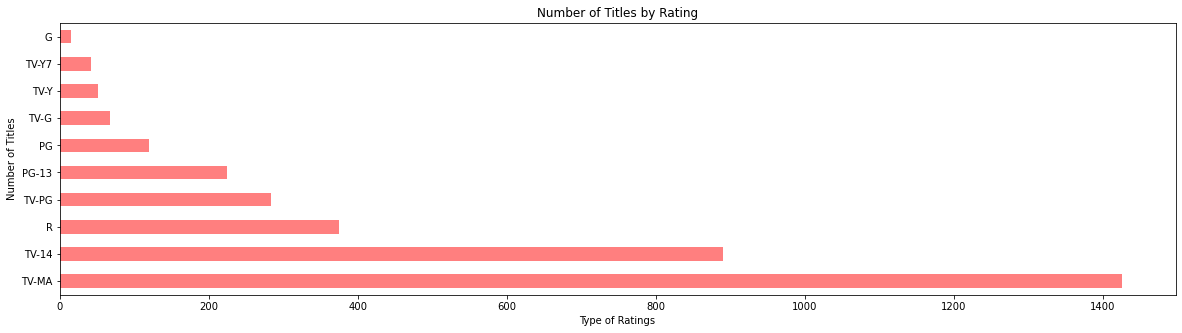

In [47]:
rating.plot(kind = "barh", alpha = .50, figsize =(20,5), color = "red")
plt.xlabel("Type of Ratings")
plt.ylabel("Number of Titles")
plt.title("Number of Titles by Rating")
plt.savefig("Number of Titles by Rating.png")
plt.show()

In [48]:
#from datetime import datetime
import datetime
import time
final_nf_df['Date Added'] = pd.to_datetime(final_nf_df['Date Added'])
final_nf_df['Date Added'] =final_nf_df['Date Added'].dt.strftime('%Y')
final_nf_df

C:\Users\stefa\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\stefa\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Show Id,Title,Genres,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"Horror Movies, International Movies, Thrillers",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,2020
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Documentaries, International Movies",Italy,2019.0,TV-14,95 min,6.4/10,Movie,2020
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,"Documentaries, International Movies",Canada,2020.0,TV-14,90 min,5.1/10,Movie,2020
5,c293788a-41f7-49a3-a7fc-005ea33bce2b,#FriendButMarried,"Dramas, International Movies, Romantic Movies",Indonesia,2018.0,TV-G,102 min,7.0/10,Movie,2020
6,0555e67e-f624-4a05-93e4-55c117d0056d,#FriendButMarried 2,"Dramas, International Movies, Romantic Movies",Indonesia,2020.0,TV-G,104 min,7.0/10,Movie,2020
...,...,...,...,...,...,...,...,...,...,...
5957,309b0d7e-357b-45ce-b1cf-617b4c3593d5,Zoot Suit,"Cult Movies, Dramas, Music & Musicals",United States,1981.0,R,103 min,7.0/10,Movie,2021
5958,a006d6c6-e213-4a8b-9f57-b941e822d0c5,Zozo,"Dramas, International Movies","Sweden, Czech Republic, United Kingdom, Denmar...",2005.0,TV-MA,99 min,6.7/10,Movie,2020
5961,06aab7f2-9756-4680-98cf-209b7ca86a9b,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,"Documentaries, Music & Musicals","United Kingdom, Canada, United States",2019.0,TV-MA,90 min,7.4/10,Movie,2020
5962,62b8b682-f191-4c10-aa04-32319329bd8d,الف مبروك,"Comedies, Dramas, International Movies",Egypt,2009.0,TV-14,115 min,7.4/10,Movie,2020


In [49]:
final_nf_df[['IMDB Score', 'delete']] = final_nf_df['Imdb Score'].str.split('/', expand=True)
#new_reduced.dtypes

C:\Users\stefa\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [50]:
final_nf_df[['Duration (min)', 'deletemin']] = final_nf_df['Duration'].str.split(' ', expand=True)
final_nf_df["Release Date"]=final_nf_df["Release Date"].astype("int")
final_nf_df["IMDB Score"]=final_nf_df["IMDB Score"].astype("float")
final_nf_df["Duration (min)"]=final_nf_df["Duration (min)"].astype("int")
final_nf_df

C:\Users\stefa\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\stefa\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\stefa\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,Show Id,Title,Genres,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added,IMDB Score,delete,Duration (min),deletemin
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"Horror Movies, International Movies, Thrillers",South Korea,2020,TV-MA,99 min,6.2/10,Movie,2020,6.2,10,99,min
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Documentaries, International Movies",Italy,2019,TV-14,95 min,6.4/10,Movie,2020,6.4,10,95,min
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,"Documentaries, International Movies",Canada,2020,TV-14,90 min,5.1/10,Movie,2020,5.1,10,90,min
5,c293788a-41f7-49a3-a7fc-005ea33bce2b,#FriendButMarried,"Dramas, International Movies, Romantic Movies",Indonesia,2018,TV-G,102 min,7.0/10,Movie,2020,7.0,10,102,min
6,0555e67e-f624-4a05-93e4-55c117d0056d,#FriendButMarried 2,"Dramas, International Movies, Romantic Movies",Indonesia,2020,TV-G,104 min,7.0/10,Movie,2020,7.0,10,104,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5957,309b0d7e-357b-45ce-b1cf-617b4c3593d5,Zoot Suit,"Cult Movies, Dramas, Music & Musicals",United States,1981,R,103 min,7.0/10,Movie,2021,7.0,10,103,min
5958,a006d6c6-e213-4a8b-9f57-b941e822d0c5,Zozo,"Dramas, International Movies","Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99 min,6.7/10,Movie,2020,6.7,10,99,min
5961,06aab7f2-9756-4680-98cf-209b7ca86a9b,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,"Documentaries, Music & Musicals","United Kingdom, Canada, United States",2019,TV-MA,90 min,7.4/10,Movie,2020,7.4,10,90,min
5962,62b8b682-f191-4c10-aa04-32319329bd8d,الف مبروك,"Comedies, Dramas, International Movies",Egypt,2009,TV-14,115 min,7.4/10,Movie,2020,7.4,10,115,min


In [51]:
final_nf_2021 = final_nf_df.drop(['delete', 'deletemin', 'Imdb Score', 'Duration','Show Id'], axis = 1)
final_nf_2021

,Title,Genres,Production Country,Release Date,Rating,Content Type,Date Added,IMDB Score,Duration (min)
1,#Alive,"Horror Movies, International Movies, Thrillers",South Korea,2020,TV-MA,Movie,2020,6.2,99
2,#AnneFrank - Parallel Stories,"Documentaries, International Movies",Italy,2019,TV-14,Movie,2020,6.4,95
4,#cats_the_mewvie,"Documentaries, International Movies",Canada,2020,TV-14,Movie,2020,5.1,90
5,#FriendButMarried,"Dramas, International Movies, Romantic Movies",Indonesia,2018,TV-G,Movie,2020,7.0,102
6,#FriendButMarried 2,"Dramas, International Movies, Romantic Movies",Indonesia,2020,TV-G,Movie,2020,7.0,104
...,...,...,...,...,...,...,...,...,...
5957,Zoot Suit,"Cult Movies, Dramas, Music & Musicals",United States,1981,R,Movie,2021,7.0,103
5958,Zozo,"Dramas, International Movies","Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,Movie,2020,6.7,99
5961,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,"Documentaries, Music & Musicals","United Kingdom, Canada, United States",2019,TV-MA,Movie,2020,7.4,90
5962,الف مبروك,"Comedies, Dramas, International Movies",Egypt,2009,TV-14,Movie,2020,7.4,115


In [52]:
# content = final_nf_2021["Content Type"].value_counts()
# content
# content.plot.pie(y= 'Content Type', figsize = (8,8), autopct='%1.1f%%',colors=['red','blue'], startangle=30 )
# plt.savefig("Content Type _Pie.png") 
# plt.legend();


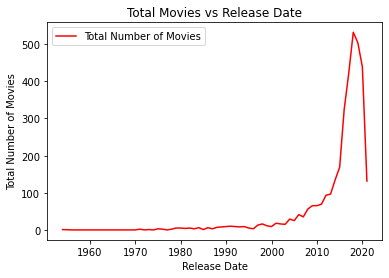

In [53]:
year = final_nf_2021["Release Date"].value_counts()
year
year_counts = final_nf_2021.groupby("Release Date").count()

pandas_line = year_counts[["Title"]].rename(columns = {"Title":"Total Number of Movies"})
pandas_line.plot(kind = "line", color = "red")
plt.ylabel("Total Number of Movies")
plt.title("Total Movies vs Release Date")
plt.savefig("Total Movies vs Release Date.png")
plt.show()
# Regression line 


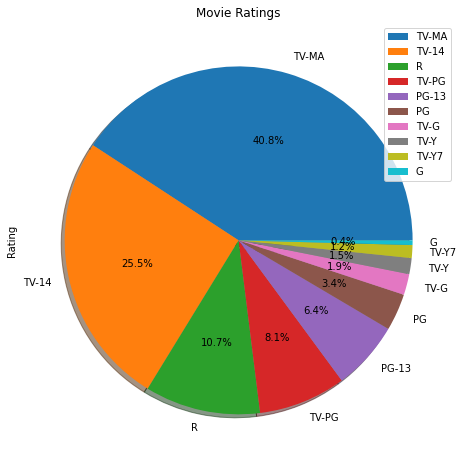

In [54]:
# rating = rating["Rating"].value_counts()
rating.plot.pie(shadow = True, figsize = (8,8), autopct='%1.1f%%')
plt.title("Movie Ratings")
plt.savefig('Ratings_pie.png')
plt.legend()


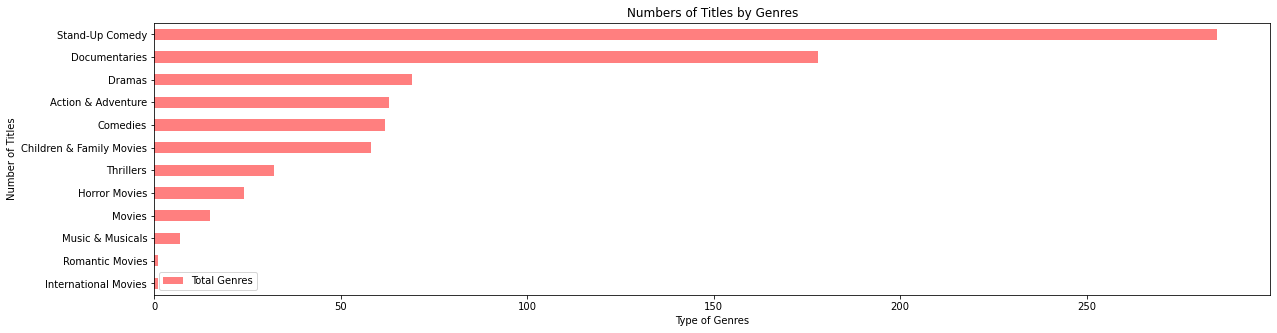

In [55]:
#pokemon_games = df.loc[df['Name'].str.contains("pokemon", case=False)]
final_Production_countries = final_nf_2021.loc[final_nf_2021["Genres"].str.contains(",")== False]
final_Production_countries
countries_count = final_Production_countries.groupby("Genres").count()
group_data= final_Production_countries.groupby("Genres")
countries_count_df = pd.DataFrame({"Total Genres":group_data['Genres'].count()})
countries_count_df_sort = countries_count_df.sort_values(by=['Total Genres'], ascending=True)
countries_count_df_sort
pandas_bar = countries_count_df_sort[["Total Genres"]].rename(columns = {"Title":"Total Number of Movies"})
pandas_bar = countries_count_df_sort[["Total Genres"]]
pandas_bar.plot(kind = "barh", alpha = .50, figsize =(20,5), color = "red")
plt.xlabel("Type of Genres")
plt.ylabel("Number of Titles")
plt.title("Numbers of Titles by Genres")
plt.savefig("Numbers of Titles by Genres.png")
plt.show()

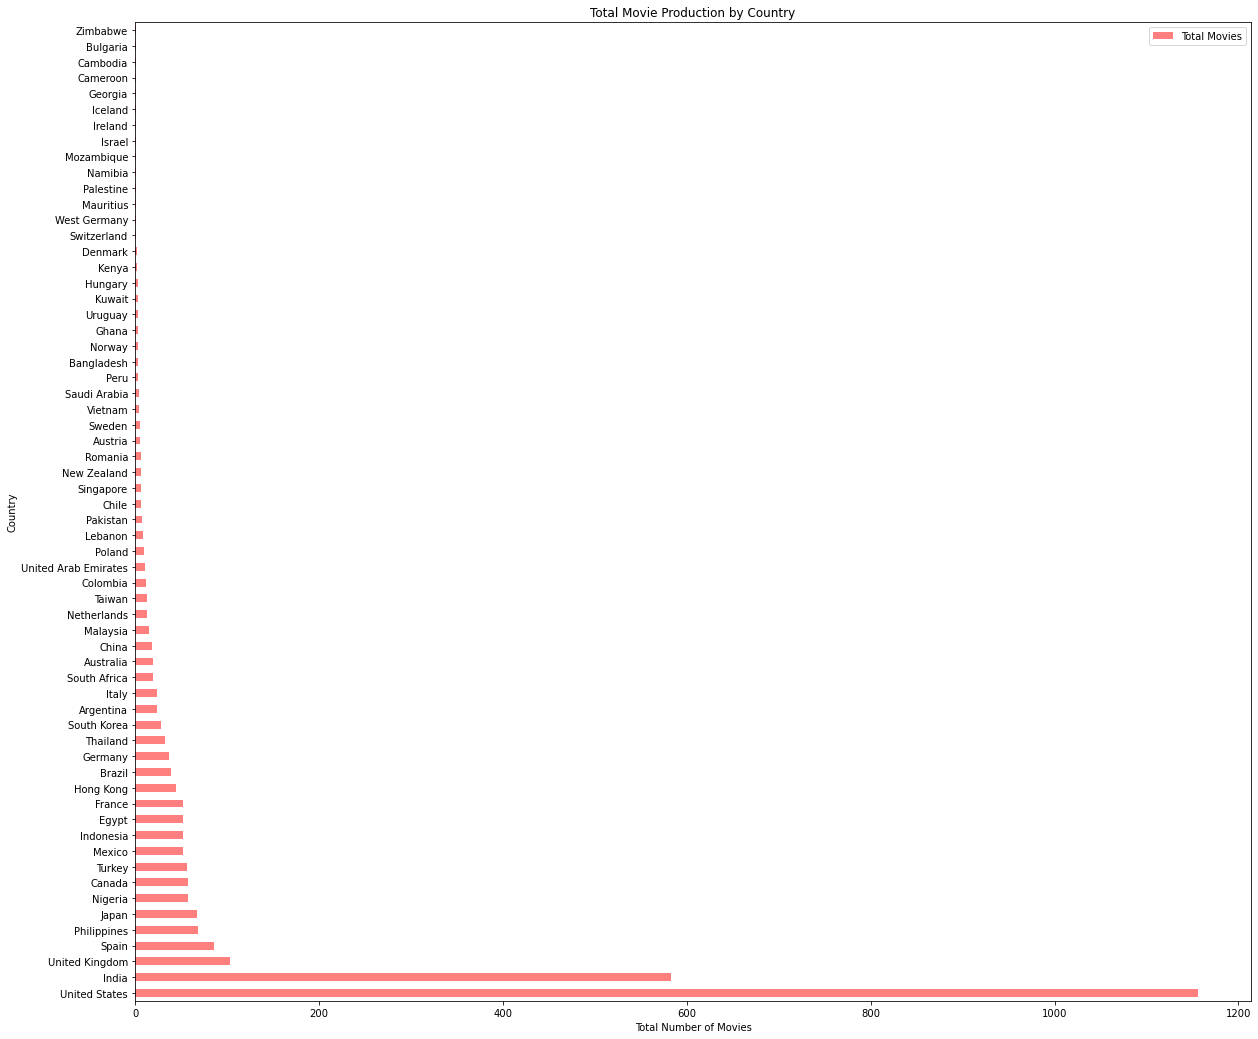

In [56]:
#pokemon_games = df.loc[df['Name'].str.contains("pokemon", case=False)]
final_Production_countries = final_nf_2021.loc[final_nf_2021["Production Country"].str.contains(",")== False]
final_Production_countries
countries_count = final_Production_countries.groupby("Production Country").count()
group_data= final_Production_countries.groupby("Production Country")
countries_count_df = pd.DataFrame({"Total Movies":group_data['Production Country'].count()})
countries_count_df_sort = countries_count_df.sort_values(by=['Total Movies'], ascending=False)
countries_count_df_sort
pandas_bar = countries_count_df_sort[["Total Movies"]].rename(columns = {"Title":"Total Number of Movies"})
pandas_bar = countries_count_df_sort[["Total Movies"]]
pandas_bar.plot(kind = "barh", alpha = .50, figsize=(20,18), color = "red", )
# plt.xticks(rotation=45,
#     horizontalalignment='right')
plt.ylabel("Country")
plt.xlabel("Total Number of Movies")
plt.title("Total Movie Production by Country")
plt.savefig("Total Movie Production by Country horizontal.pdf")
plt.show()

y = -0.02x +44.86
The r-value is: 0.018993423258591505


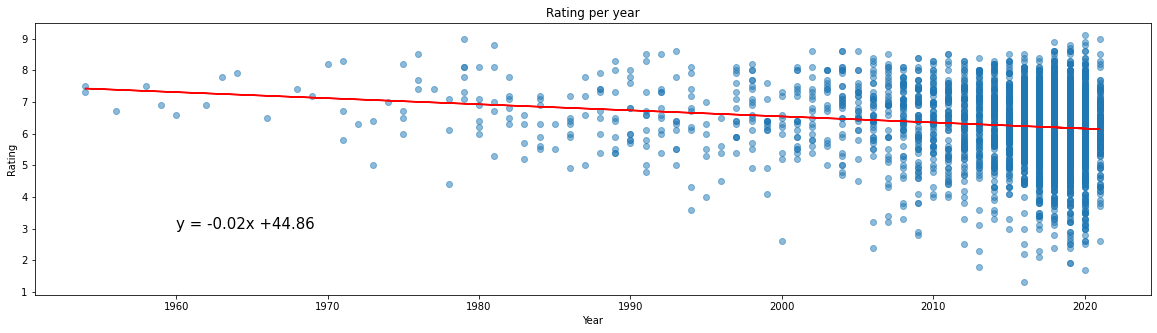

In [57]:
x_values = final_nf_2021["Release Date"]
y_values = final_nf_2021["IMDB Score"]
plt.figure(figsize=(20, 5))
plt.scatter(x_values, y_values, alpha=0.5)
#plt.yticks(np.arange(min(0), max(10)+1, 1.0))

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Rating per year')

# Label plot and annotate the line equation
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1960,3),fontsize=15,color="black")
# Print r value
print(f"The r-value is: {rvalue**2}")

plt.savefig("Rating per year2021.pdf")
plt.show()


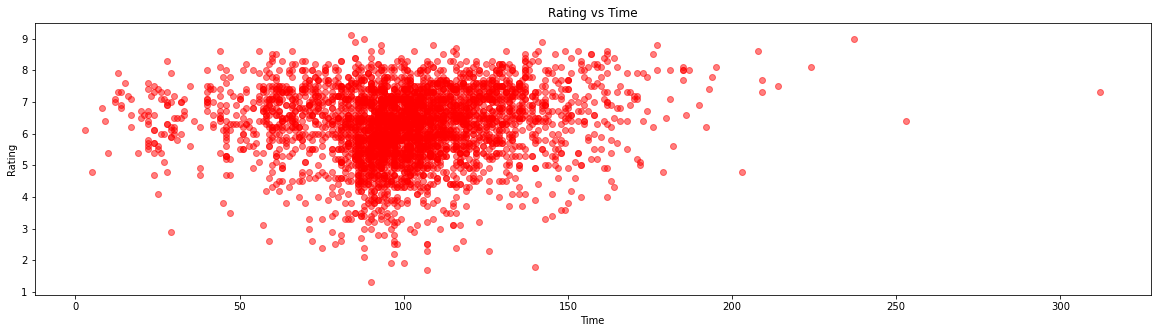

In [58]:
x = final_nf_2021["Duration (min)"]
y = final_nf_2021["IMDB Score"]
plt.figure(figsize=(20, 5))
plt.scatter(x, y, alpha=0.5, color="red")
#plt.yticks(np.arange(min(0), max(10)+1, 1.0))
plt.xlabel('Time')
plt.ylabel('Rating')
plt.title('Rating vs Time')
plt.savefig("Rating vs Time.png")
plt.show()

In [59]:
# year_max = final_nf_2021.groupby("Release Date").max()
# year_max